# Types of Regression Algorithms

In this note book we will be talking about 6 types of regression Machine Learning algorithms in detail. Those six Algorithms are as follows,

    1. Simple Linear Regression
    2. Multiple Linear Regression
    3. Polynomial Regression
    4. Support Vector for Regression (SVR)
    5. Decision Tree Classification
    6. Random Forest Classification

## What is Regression used for...

As we learned there are mainly two type of ML Problems,

   * Predicting a Label(Classification)
   * Predicting a value(Regression)

So unlike in classification problems in regression problems what is done is model is trained on data and used to predict a value.

Ex: Predicting a price of a car when certain parameters and details are given.

## 1. Simple Linear Regression

This is the simplest algorithm hence the name. How this model(algorithm) works is that, it look at the training data its given `X_test, y_test` and try to draw a linear line that would best fit the all the data points.

<img alt="Simple Linear Regression Demostration" src="./images/simple_linear_regression.png" style="width:55%;height:auto"/>

Model draws a regression line, `y = b0 + b1*X` just as normal `y = mx + c`. Where,
   * b0 = constant (intercept)
   * b1 = this represent how unit change in X (independent variable) affect the values y (dependent variable)

As shown in the above figure, what the model does is it draws several regression lines and it take the sum as `SUM = Residuals**2` and store them. And pick the regression line with the __Minimum Sum__ as the final Regression Line.

In [71]:
# Simple Linear Regression Model

# Import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# set a random seed globally
np.random.seed(42)

In [72]:
# lets preprocess our data

# import the data
data = pd.read_csv('data/Simple Linear Regression/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
# now we have to check if there are any missing values
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [74]:
# Okay no missing values then lets just see details of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [75]:
# All numeric data type and we dont have to manipulate data

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


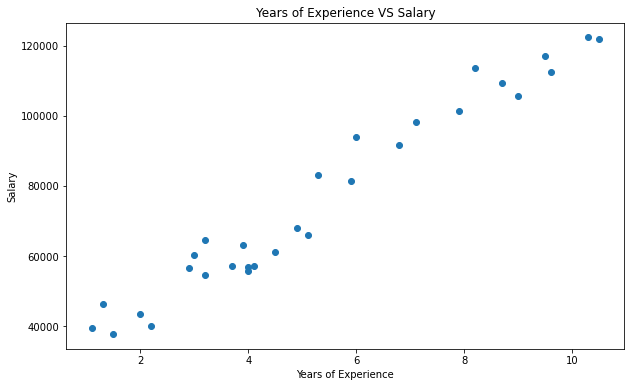

In [76]:
# Lets plot these and see
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(x=data['YearsExperience'],y=data['Salary'],cmap="winter", marker='o')
ax.set_title('Years of Experience VS Salary')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

In [77]:
# lets divide our data into X and y
X = data.drop('Salary',axis=1)
y = data['Salary']

# Lets split the data to train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3)

In [78]:
len(X_train), len(X_test)

(20, 10)

In [79]:
# Now we can fit the data to our model

# Importing the simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train,y=y_train)

LinearRegression()

In [80]:
# Now lets see the score
model.score(X=X_test, y=y_test)

0.9553063138044949

In [81]:
# 95% Score.... Not bad

# lets see some predictions
y_pred = model.predict(X_test)

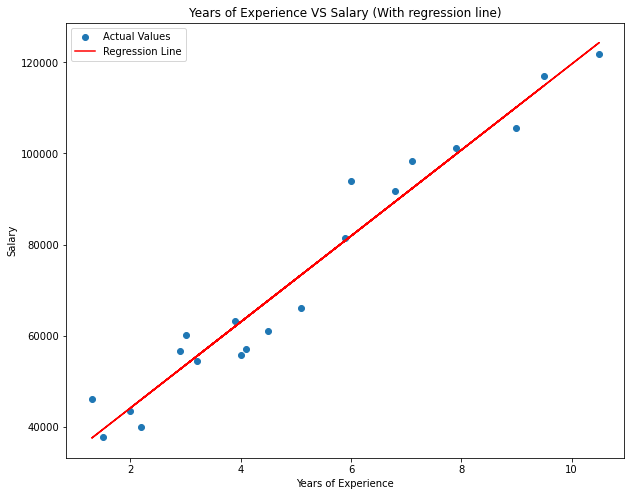

In [83]:
# So now we can plot the regression Line

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=X_train,y=y_train,cmap="winter", marker='o', label='Actual Values')
ax.plot(X_train,model.predict(X_train),color='red',label='Regression Line')
ax.legend()
ax.set_title('Years of Experience VS Salary (With regression line)')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

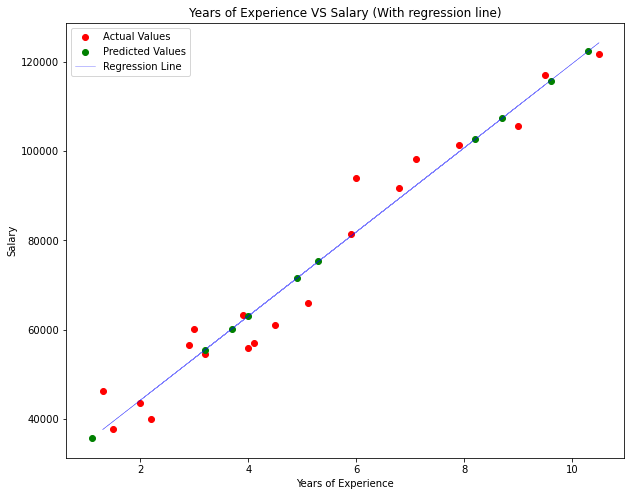

In [90]:
# lets see how well this model can predict new values

# So now we can plot the regression Line

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=X_train,y=y_train,cmap="winter", marker='o', label='Actual Values', color='red')
ax.scatter(x=X_test,y=y_pred,cmap="winter", marker='o', label='Predicted Values', color='green')
ax.plot(X_train,model.predict(X_train),color='blue',label='Regression Line',linewidth=0.5,alpha=0.5)
ax.legend()
ax.set_title('Years of Experience VS Salary (With regression line)')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');